In [5]:
#@title Files for Import
import_file = "mlwpy.py" #@param {type:"string"}

#import libraries
import re
import importlib

#create regex
find = re.compile(r"^(.*?)\..*")
# extract file name before .py ending
import_file_no_ext = re.search(find, import_file).group(1)

# copy file to the current notebook
!cp '/content/drive/MyDrive/Colab Notebooks/imports/{import_file}' .
# import module
module = importlib.import_module(import_file_no_ext)

# is there an __all__? if so import all
if '__all__' in module.__dict__:
    names = module.__dict__['__all__']
else:
    # otherwise import all names that don't begin with _
    names = [x for x in module.__dict__ if not x.startswith('_')]

# now bring them in
globals().update({k: getattr(module, k) for k in names})

print(f'Imported file: {import_file_no_ext}.py')

# set matplotlib to display inline
%matplotlib inline

Imported file: mlwpy.py


In [6]:
#save default font settings
IPython_default = plt.rcParams.copy()

# set fonts / set text size
#@title matplotlib font settings
small_text = 15 #@param {type:"integer"}
medium_text = 26 #@param {type:"integer"}
large_text = 28 #@param {type:"integer"}
line_marker_size = 5 #@param {type:"slider", min:0, max:10, step:0.5}
legend_shadow = True #@param {type:"boolean"}
fig_width =  8 #@param {type:"number"}
fig_height =  6 #@param {type:"number"}
sns_style = "ticks" #@param ["darkgrid", "whitegrid", "dark", "white", "ticks"]
axis_grid = True #@param {type:"boolean"}
sns_palette = "deep" #@param ["pastel", "muted", "bright", "deep", "colorblind", "dark"]

import matplotlib.pyplot as plt
import seaborn as sns

# restore defaults
plt.rcdefaults()

#run configuration parameters
plt.rcParams['axes.labelsize']   = small_text
plt.rcParams['axes.titlesize']   = small_text
plt.rcParams['xtick.labelsize']  = small_text
plt.rcParams['ytick.labelsize']  = small_text
plt.rcParams['legend.fontsize']  = small_text
plt.rcParams['legend.shadow']    = legend_shadow
plt.rcParams['lines.markersize'] = line_marker_size
plt.rcParams['figure.figsize']   = (fig_width, fig_height)
plt.rcParams['font.size']        = small_text

# seaborn settings
sns.set_style(sns_style, {"axes.grid": axis_grid})
sns.set_palette(sns_palette)

# enable wordwrap
#https://stackoverflow.com/questions/58890109/line-wrapping-in-collaboratory-google-results
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
    td,th,p {
        font-size: 18px
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# 15.1 Optimization

When we try to find a best line, curve, or tree to match our data, which is the main goal in training, we want to have an automated method do the work for us. We do this by assessing our cost and looking for ways to lower the cost. Cost is a combination of the loss, how well our model's predictions match the training data, and the complexity of the model. By minimizing cost, we try to achieve a small loss while keeping a low complexity. We cannot always get to the ideal, but that's our goal.

When training a learning model, one of th eeasiest aprameters to think about is the weights, from linear or logistic regression, that we combine with the feature values to get predictions. Since we get to adjust the weights, we look at the effect of adjusting them and see what happens to the cost. If we have a definition of the cost, a cost *function*, perhaps drawn as a graph, we can turn the adjusting process into a question. From where we are, from our current weights and the cost we get by using them, what small adjustments to the weights can we make? Is there a direction that we can go that will result in a *lower* cost? a way to think about this visually is to ask what direction is *downhill* on our cost function. Let's look at an example.

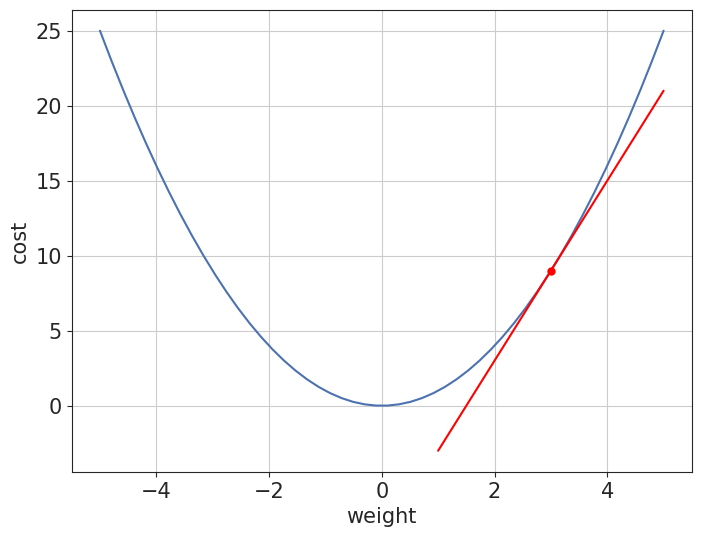

In [7]:
xs = np.linspace(-5,5)
ys = xs**2

fig, ax = plt.subplots(1,1)
ax.plot(xs, ys)

# better Python:
# pt = co.namedtuple('Point', ['x', 'y'])(3,3**2)
pt_x, pt_y = 3, 3**2
ax.plot(pt_x, pt_y, 'ro')

line_xs = pt_x + np.array([-2, 2])
# line ys = mid_point + (x amount) * slope_of_line
# one step right gets one "slope of line" increase in that line's up
line_ys = 3**2 + (line_xs - pt_x) * (2 * pt_x)
ax.plot(line_xs, line_ys, 'r-')
ax.set_xlabel('weight')
ax.set_ylabel('cost');